# California House Price Prediction:

## About Dataset:

DESCRIPTION

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it.

Problem Objective:
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

### Domain: Finance and Housing

# Dataset Description:
Field and Description

longitude (signed numeric - float) : Longitude value for the block in California, USA


latitude (numeric - float ) : Latitude value for the block in California, USA


housing_median_age (numeric - int ) : Median age of the house in the block


total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block


total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block


population (numeric - int ) : Count of the total number of population in the block


households (numeric - int ) : Count of the total number of households in the block


median_income (numeric - float ) : Median of the total household income of all the houses in the block


ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]


median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import StratifiedShuffleSplit,train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import PowerTransformer

plt.tight_layout()

from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

## Import the dataset:

In [2]:
data = pd.read_csv('1553768847-housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Working in the copy of the dataset:

In [3]:
df = data.copy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Basic Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.size

206400

In [7]:
col = df.columns.to_list()
col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [8]:
for i in col:
    print('The datatype of',i, 'is', df[i].dtypes)

The datatype of longitude is float64
The datatype of latitude is float64
The datatype of housing_median_age is int64
The datatype of total_rooms is int64
The datatype of total_bedrooms is float64
The datatype of population is int64
The datatype of households is int64
The datatype of median_income is float64
The datatype of ocean_proximity is object
The datatype of median_house_value is int64


## Summary Statistics for Categoric and Numeric Columns:

In [9]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [10]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['ocean_proximity']

In [11]:
df[num].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df[cat].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## Checking the null values:

In [13]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

## Treating the null values:

In [14]:
df['total_bedrooms'].isna().sum()

207

In [15]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
a=round(df.groupby(['ocean_proximity'])['total_bedrooms'].mean()[1],0)
a

534.0

In [17]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(a)

In [18]:
df['total_bedrooms'].isna().sum()

0

## Remove unwanted columns:

In [19]:
col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [20]:
df.drop(['longitude','latitude'],axis=1,inplace=True)

In [21]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [22]:
columns = df.columns.to_list()
columns

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [23]:
coll = ['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

## Data Visualization:

### Univariate:

In [24]:
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [25]:
cat

['ocean_proximity']

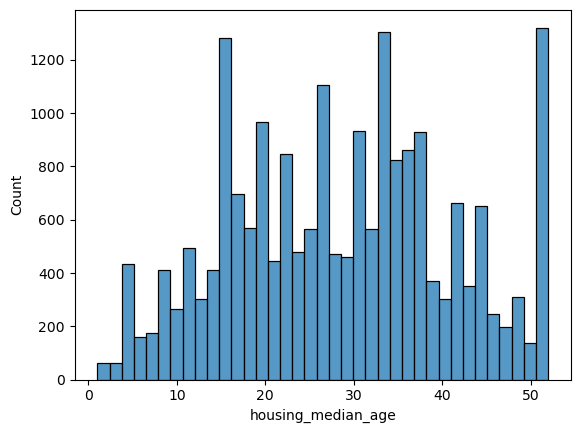

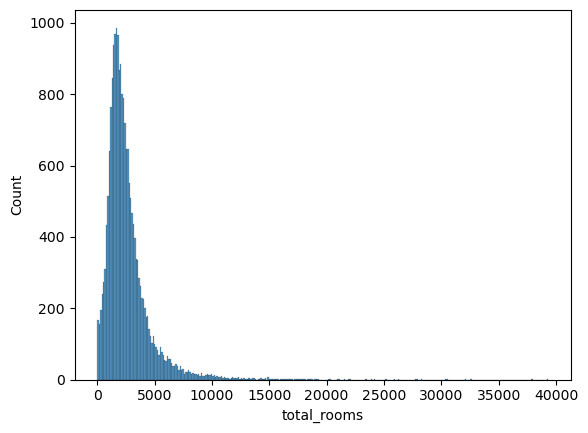

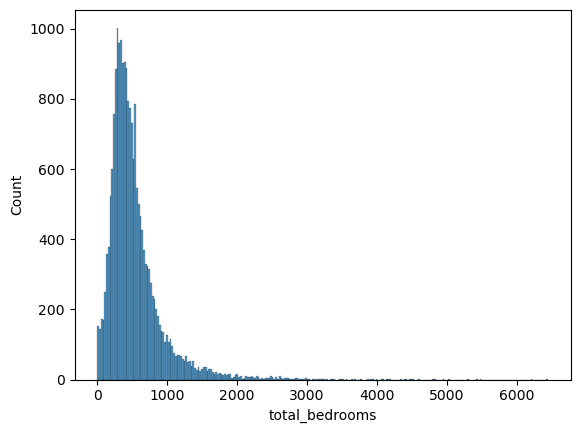

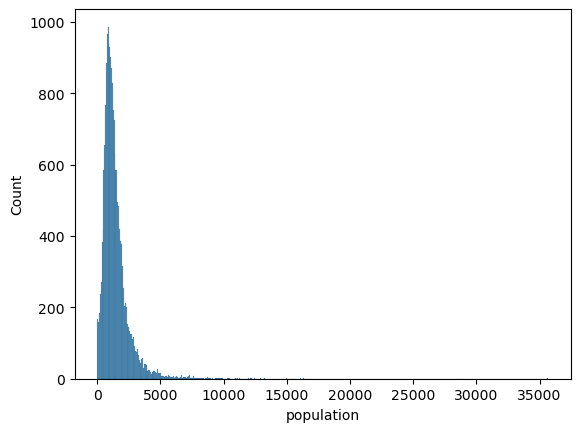

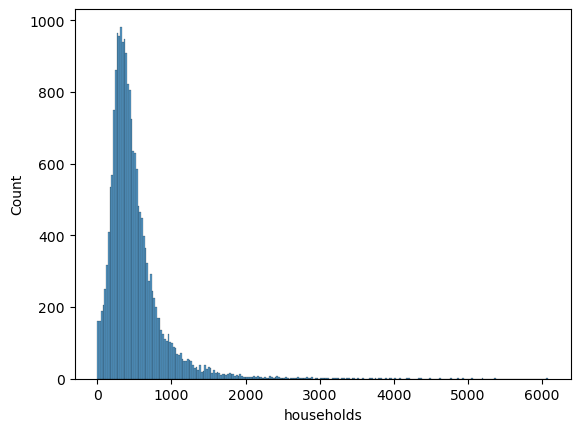

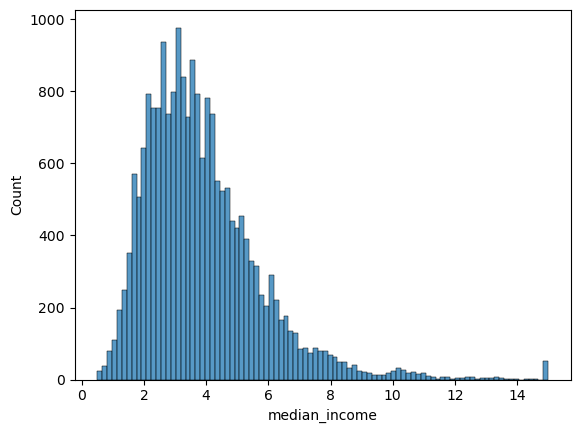

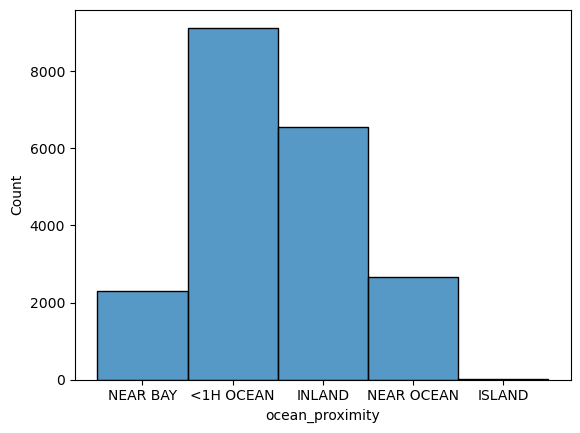

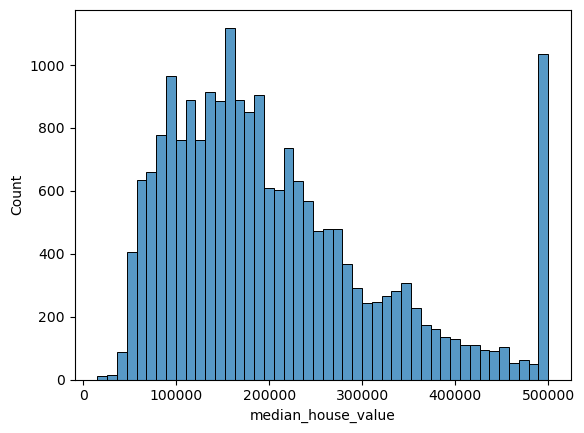

In [26]:
for i in columns:
    sns.histplot(df[i])
    plt.show()

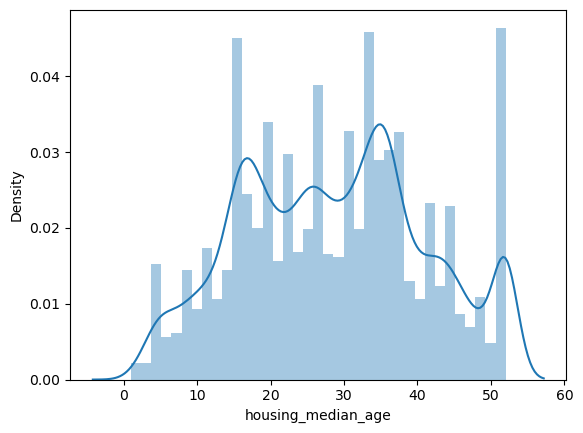

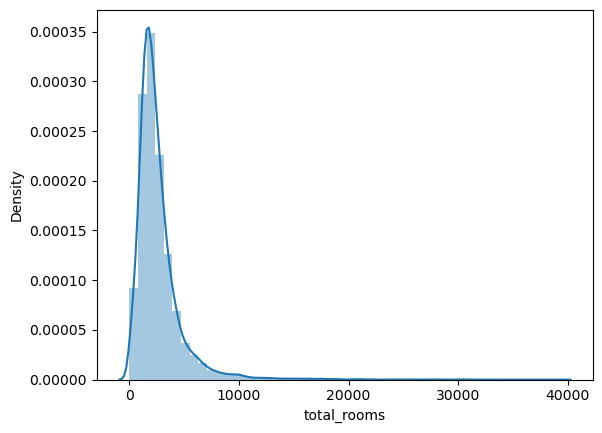

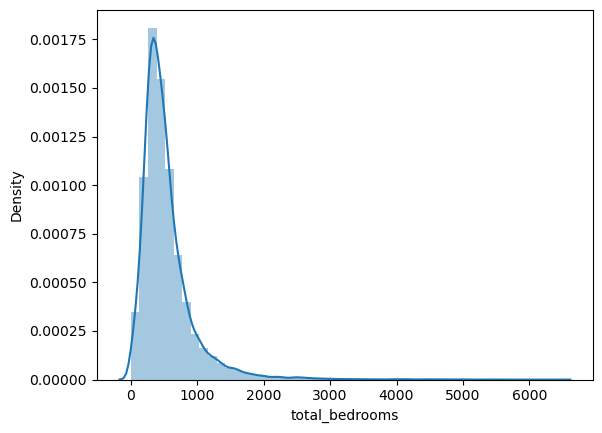

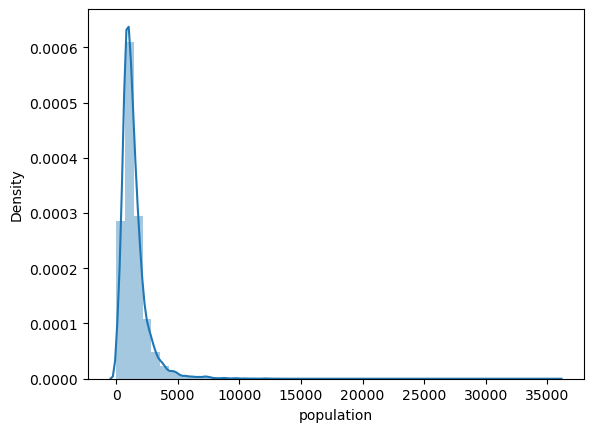

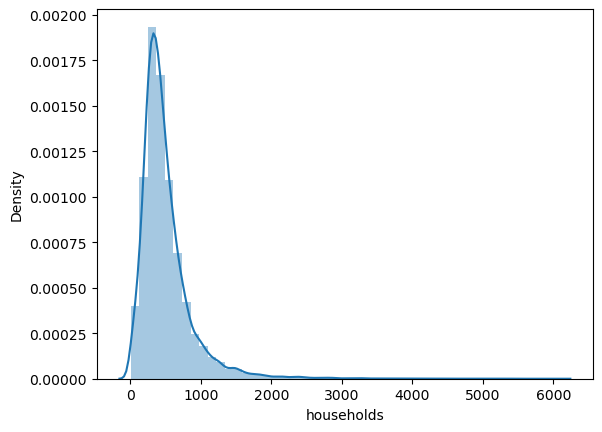

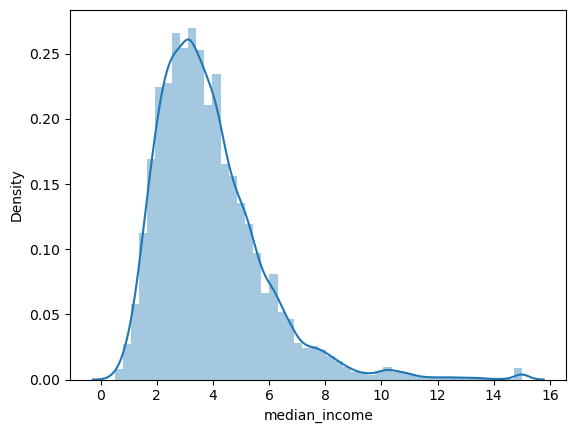

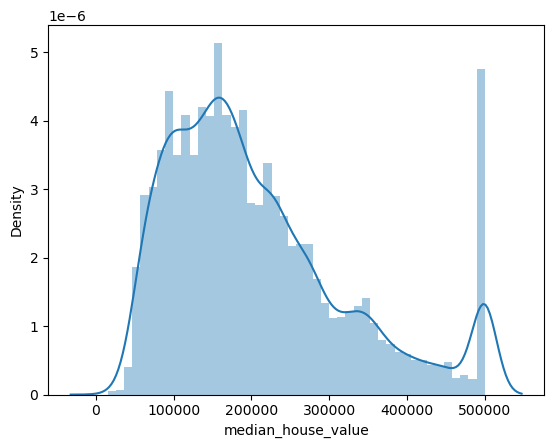

In [27]:
for i in coll:
    sns.distplot(df[i])
    plt.show()

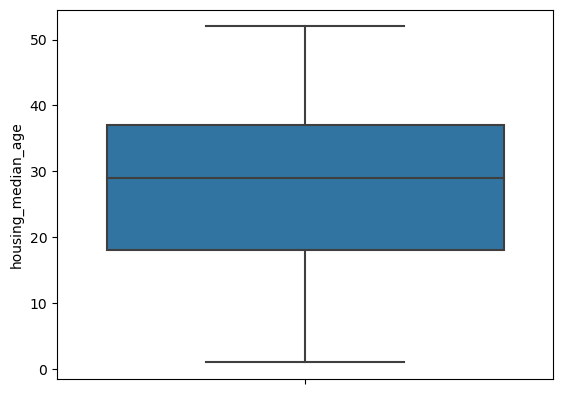

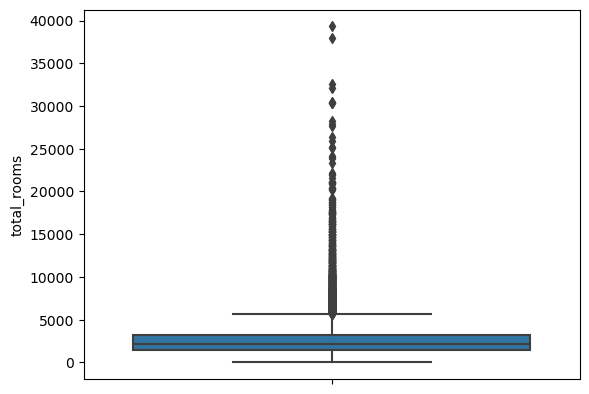

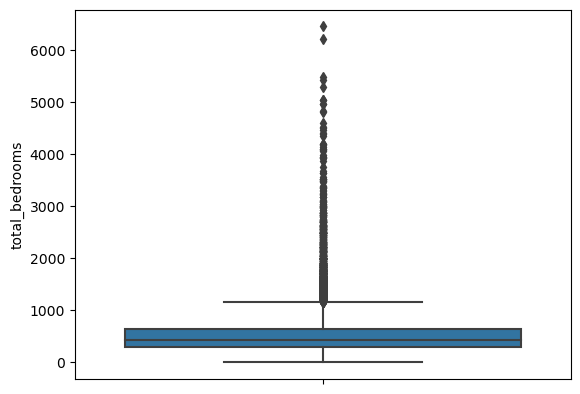

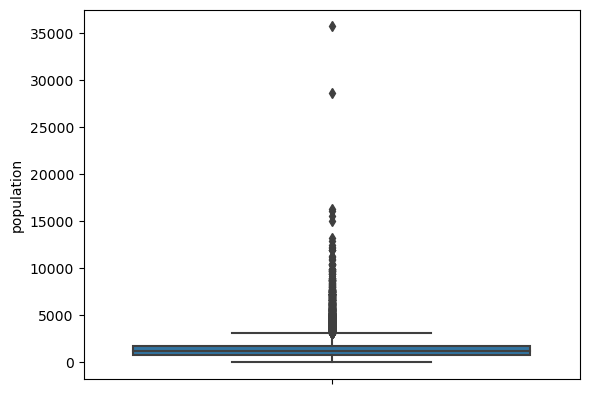

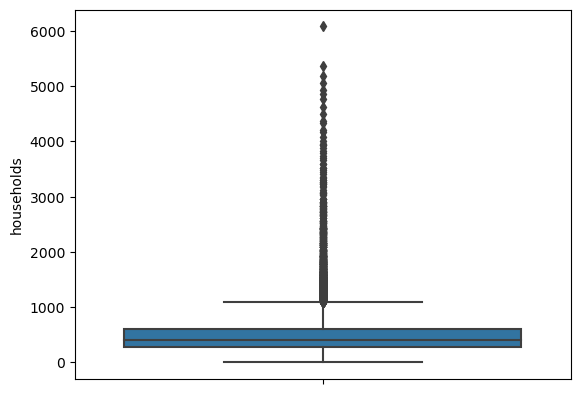

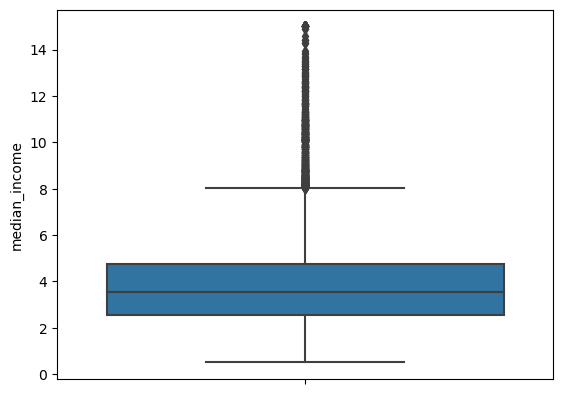

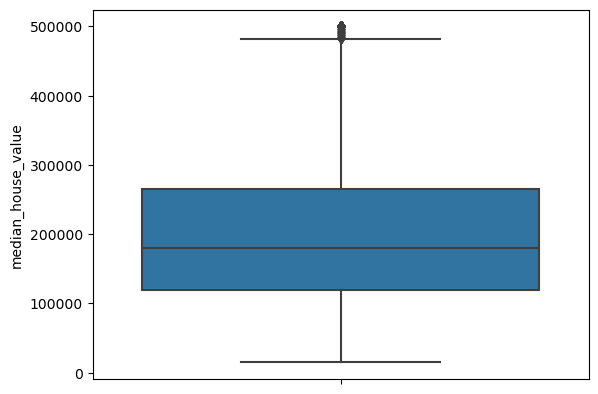

In [28]:
for i in coll:
    sns.boxplot(y=df[i])
    plt.show()

In [29]:
df[cat].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

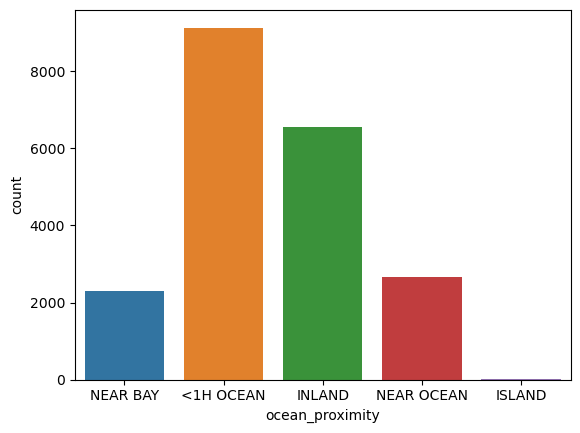

In [30]:
sns.countplot(df['ocean_proximity'])
plt.show()

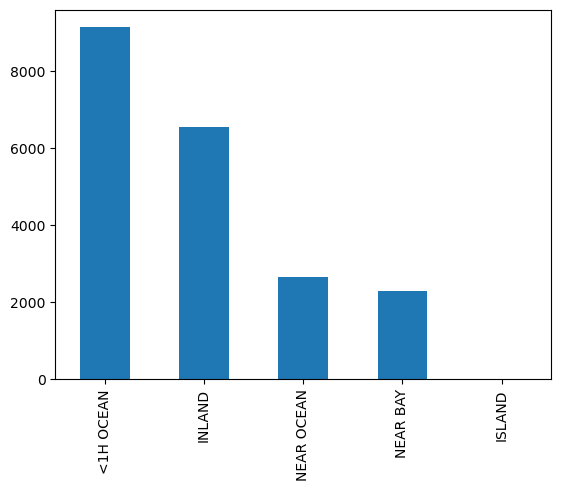

In [31]:
df['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

**Since data of Island is of very lesser data comparing to other values so i am romoving it**

## Removing the outliers:

In [32]:
dff = df[df['ocean_proximity'] != 'ISLAND']

In [33]:
dff

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [34]:
dff['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

### Bivariate:

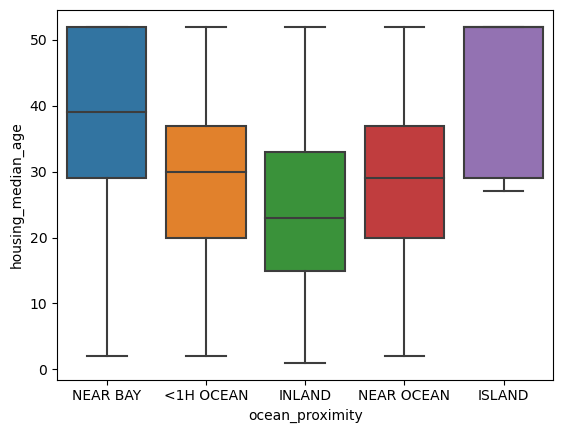

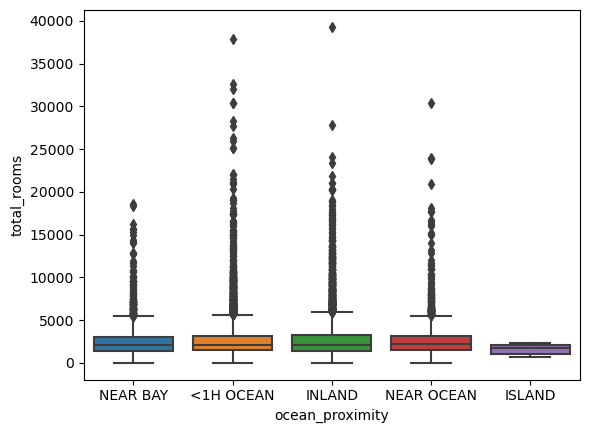

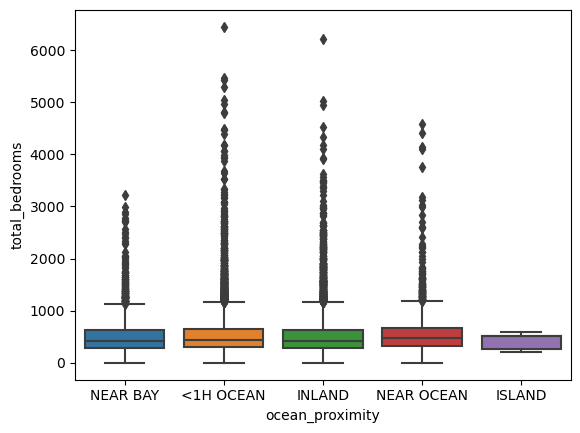

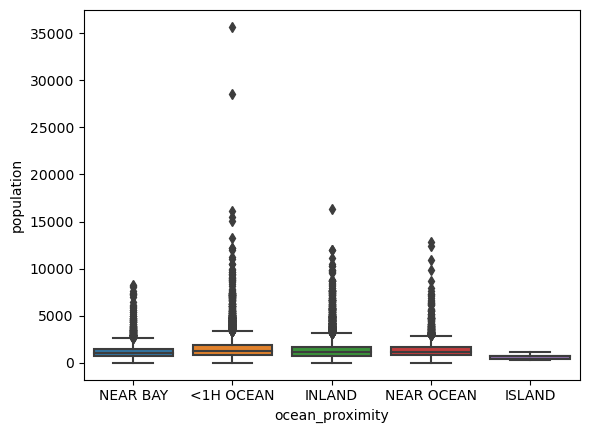

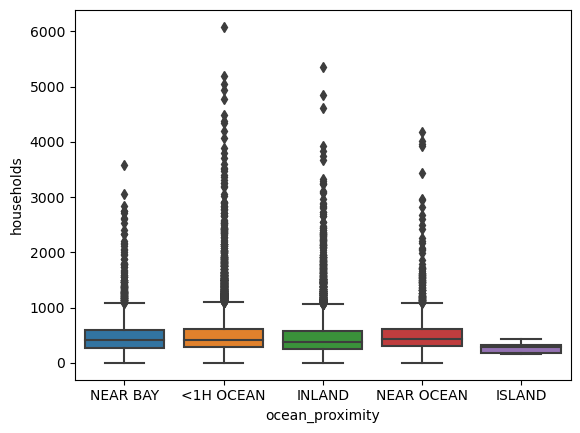

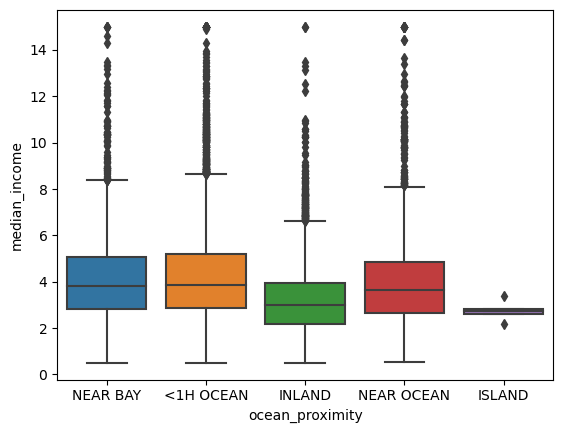

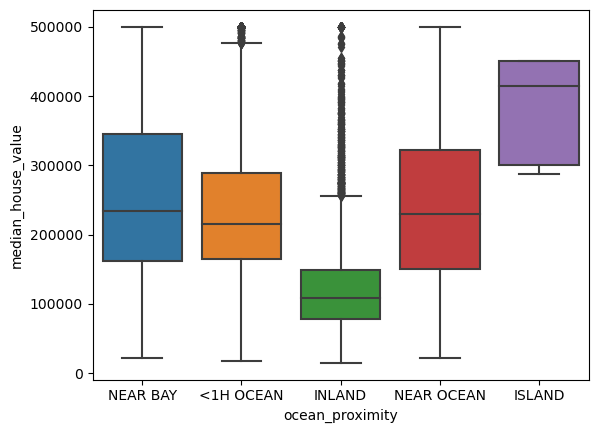

In [35]:
for i in coll:
    sns.boxplot(y=df[i],x=df['ocean_proximity'])
    plt.show()

In [36]:
c = ['households','total_rooms','total_bedrooms']

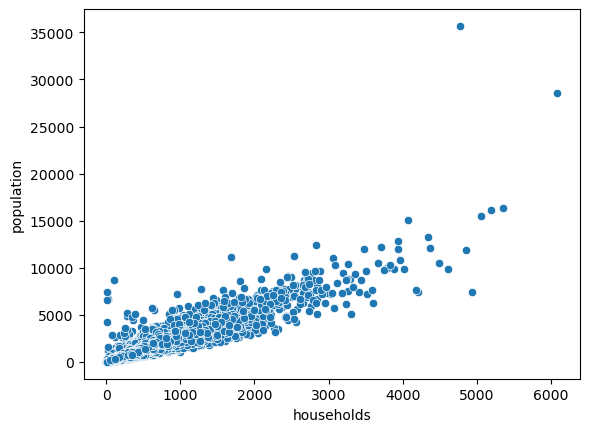

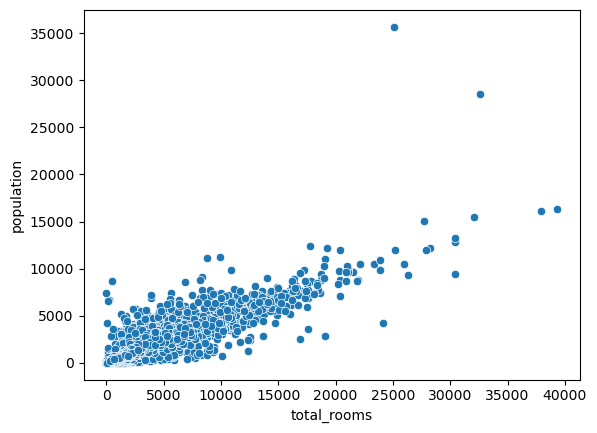

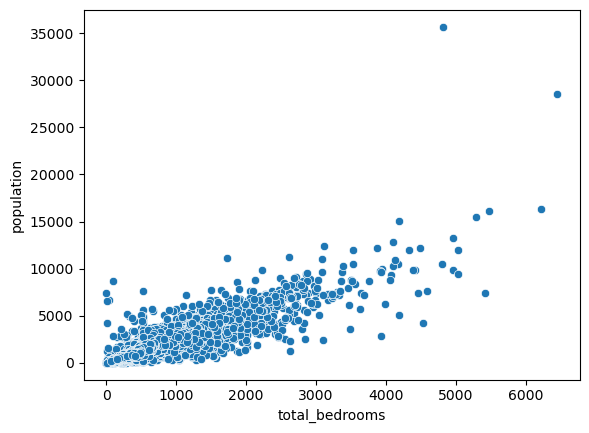

In [37]:
for i in c:
    sns.scatterplot(df[i],df['population'])
    plt.show()

In [38]:
ind = ['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [39]:
dep = ['median_house_value']

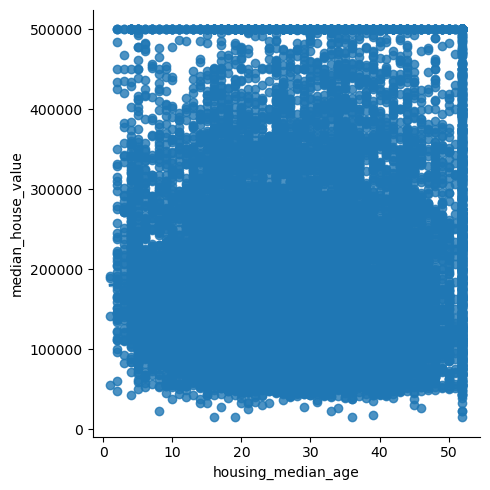

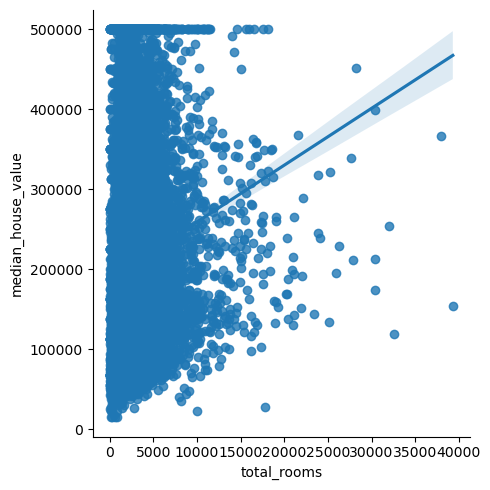

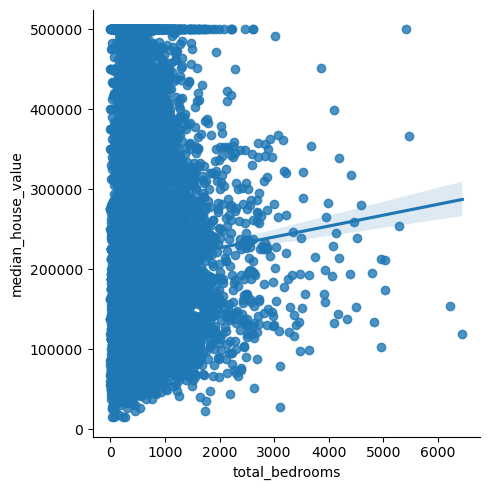

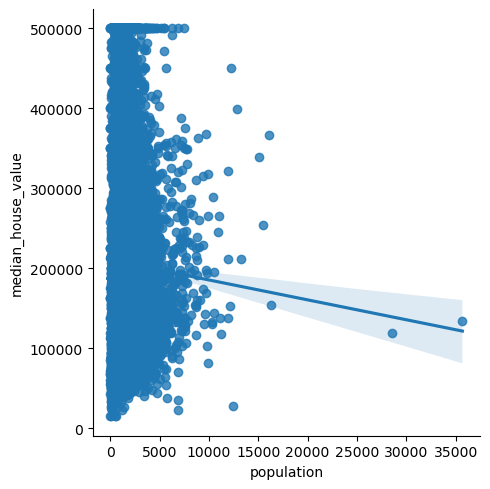

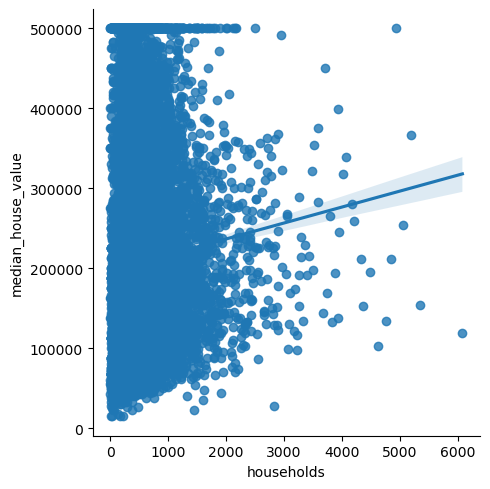

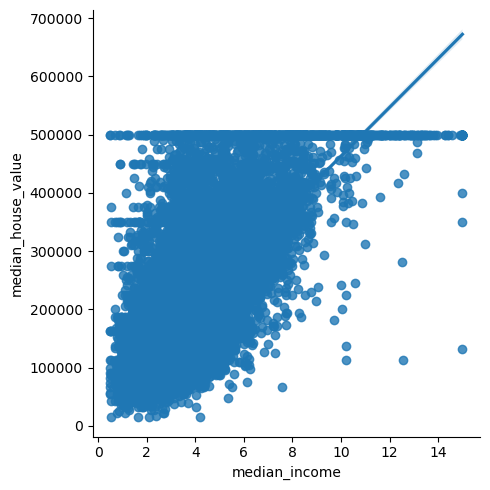

In [40]:
for i in ind:
    sns.lmplot(data=dff, x=i , y='median_house_value')
    plt.show()

### Multivariate:

In [41]:
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

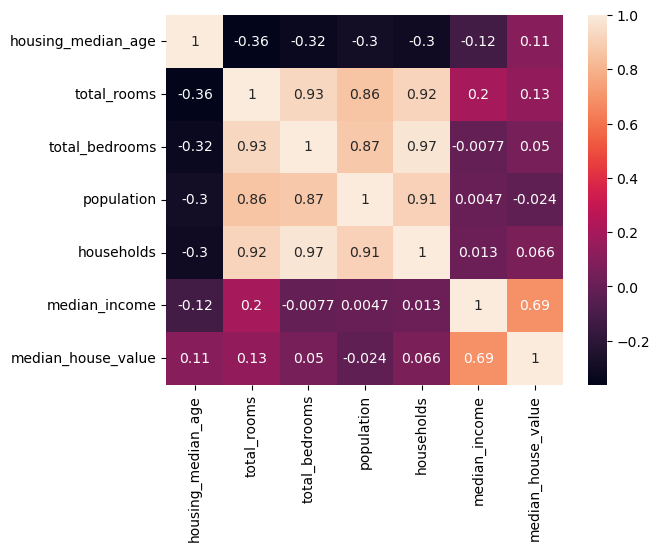

In [42]:
sns.heatmap(dff[coll].corr(),annot=True)
plt.show()

* The columns total_rooms, total_bedrooms, population, household are the columns which are highly correlated 
* This can be reduces by using Variance Inflation Factor(VIF)
* The column median_income has good coorlation with target

## Transformation:

In [43]:
dff.skew()

housing_median_age    0.060234
total_rooms           4.147029
total_bedrooms        3.476972
population            4.935778
households            3.410186
median_income         1.646332
median_house_value    0.978449
dtype: float64

In [44]:
dff.kurt()

housing_median_age    -0.800617
total_rooms           32.625833
total_bedrooms        22.235360
population            73.549995
households            22.054909
median_income          4.951122
median_house_value     0.330317
dtype: float64

Except the housing_median_age column all others are highly skewed so we need to transform it

In [45]:
trans = ['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [46]:
from sklearn.preprocessing import PowerTransformer

In [47]:
p = PowerTransformer(method='box-cox')
dff[trans] = p.fit_transform(dff[trans])

In [48]:
dff

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,NEAR BAY,452600
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,NEAR BAY,358500
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,NEAR BAY,352100
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,NEAR BAY,341300
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,INLAND,78100
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,INLAND,77100
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,INLAND,92300
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,INLAND,84700


In [49]:
dff.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [50]:
dff.skew()

housing_median_age    0.060234
total_rooms           0.123319
total_bedrooms        0.115053
population            0.113149
households            0.115985
median_income         0.004883
median_house_value    0.978449
dtype: float64

## Encoding:

In [51]:
df1 = pd.get_dummies(data=dff, columns = cat,drop_first=True)

In [52]:
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,452600,0,1,0
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,358500,0,1,0
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,352100,0,1,0
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,341300,0,1,0
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,342200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,78100,1,0,0
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,77100,1,0,0
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,92300,1,0,0
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,84700,1,0,0


## Model Building:

In [53]:
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,452600,0,1,0
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,358500,0,1,0
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,352100,0,1,0
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,341300,0,1,0
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,342200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,78100,1,0,0
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,77100,1,0,0
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,92300,1,0,0
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,84700,1,0,0


In [54]:
x = df1.drop(['median_house_value'],axis=1)
y = df1['median_house_value']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [57]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(14444, 9)
(14444,)
(6191, 9)
(6191,)


## Base Model:

In [58]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [59]:
xtrainc = sm.add_constant(xtrain)
xtestc = sm.add_constant(xtest)

In [60]:
basemodel = sm.OLS(ytrain,xtrainc).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2451.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:43:00   Log-Likelihood:            -1.8211e+05
No. Observations:               14444   AIC:                         3.642e+05
Df Residuals:                   14434   BIC:                         3.643e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.945e+05   1881.527    103.384      0.000    1.91e+05    1.98e+05
housing_median_age          1156.7568     54.700     21.147      0.000    1049.537    1263.976
total_rooms                -1.686e+04   2662.618     -6.332      0.000   -2.21e+04   -1.16e+04
total_bedrooms              3.096e+04   3157.183      9.807      0.000    2.48e+04    3.72e+04
population                 -6.048e+04   1644.910    -36.767      0.000   -6.37e+04   -5.73e+04
households                  4.816e+04   3215.420     14.977      0.000    4.19e+04    5.45e+04
median_income               7.241e+04    954.735     75.838      0.000    7.05e+04    7.43e+04
ocean_proximity_INLAND     -7.001e+04   1647.759    -42.487      0.000   -7.32e+04   -6.68e+04
ocean_proximity_NEAR BAY    1259.7952   2086.374      0.604      0.546   -2829.766    5349.357
ocean_proximity_NEAR OCEAN   1.03e+04   1921.633      5.358      0.000    6529.539    1.41e+04
==============================================================================
Omnibus:                     3101.866   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9362.367
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       6.259   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R square is 0.6 that is 60 percent of target can be explained by the independent variables
* The p value of all the columns are 0 that is less than 0.05 thus all columns are significant
* Thus we also check for multicollinearity

### Check for Multicollinearity using VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [62]:
col1 = xtrainc.columns.to_list()
col1

['const',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [63]:
vif = [ VIF(xtrainc.values,i) for i in range(xtrainc.shape[1])]

In [64]:
vif_df = pd.DataFrame(vif,index=col1,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
households,29.036970
total_bedrooms,27.900273
total_rooms,19.818539
const,9.772517
population,7.584189
median_income,2.532366
ocean_proximity_INLAND,1.613604
housing_median_age,1.311950
ocean_proximity_NEAR BAY,1.206867
ocean_proximity_NEAR OCEAN,1.153040


**Remove the column households and then check for VIF**

In [65]:
xtrainc1 = xtrainc.drop('households',axis=1)
xtestc1 = xtestc.drop('households',axis=1)

In [66]:
col2 = xtrainc1.columns.to_list()
col2

['const',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [67]:
vif = [ VIF(xtrainc1.values,i) for i in range(xtrainc1.shape[1])]

In [68]:
vif_df = pd.DataFrame(vif,index=col2,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
total_rooms,19.297498
total_bedrooms,17.373498
const,9.762119
population,5.318374
median_income,2.527608
ocean_proximity_INLAND,1.579800
housing_median_age,1.305443
ocean_proximity_NEAR BAY,1.200260
ocean_proximity_NEAR OCEAN,1.151931


**Remove the column total_rooms and then check for VIF**

In [69]:
xtrainc2 = xtrainc1.drop('total_rooms',axis=1)
xtestc2 = xtestc1.drop('total_rooms',axis=1)

In [70]:
col3 = xtrainc2.columns.to_list()
col3

['const',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [71]:
vif = [ VIF(xtrainc2.values,i) for i in range(xtrainc2.shape[1])]

In [72]:
vif_df = pd.DataFrame(vif,index=col3,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
const,9.696738
total_bedrooms,4.975667
population,4.925668
ocean_proximity_INLAND,1.349469
housing_median_age,1.301890
ocean_proximity_NEAR BAY,1.192190
ocean_proximity_NEAR OCEAN,1.146928
median_income,1.124039


All the VIF values are less dhan 5, then we can proceed with further process

In [85]:
model2 = sm.OLS(ytrain,xtrainc2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3066.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:56:43   Log-Likelihood:            -1.8222e+05
No. Observations:               14444   AIC:                         3.645e+05
Df Residuals:                   14436   BIC:                         3.645e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.942e+05   1889.602    102.778      0.000    1.91e+05    1.98e+05
housing_median_age          1225.7157     54.937     22.311      0.000    1118.031    1333.400
total_bedrooms              5.168e+04   1344.224     38.447      0.000     4.9e+04    5.43e+04
population                 -4.849e+04   1336.504    -36.284      0.000   -5.11e+04   -4.59e+04
median_income               6.897e+04    641.299    107.553      0.000    6.77e+04    7.02e+04
ocean_proximity_INLAND     -7.604e+04   1519.242    -50.053      0.000    -7.9e+04   -7.31e+04
ocean_proximity_NEAR BAY    2896.9485   2090.670      1.386      0.166   -1201.033    6994.930
ocean_proximity_NEAR OCEAN  1.069e+04   1932.266      5.531      0.000    6900.224    1.45e+04
==============================================================================
Omnibus:                     2952.944   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8292.057
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.013   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#### Metrices:

from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [75]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))    

## The Sklearn Model:

In [76]:
lr = LinearRegression()

In [77]:
model3 = lr.fit(xtrainc2,ytrain)

In [78]:
ypred_tr= lr.predict(xtrainc2)
ypred_te= lr.predict(xtestc2)

In [79]:
met('Linear Regression model and result for Train',ytrain,ypred_tr)

Name of the model:  Linear Regression model and result for Train
R-square of the model: 0.5978535782252358
RMSE of the model: 72908.98374819747
MAE of the model: 54552.6413779733


In [80]:
lr.score(xtrainc2,ytrain)

0.5978535782252358

In [81]:
met('Linear Regression model and result for Test',ytest,ypred_te)

Name of the model:  Linear Regression model and result for Test
R-square of the model: 0.6118731429742901
RMSE of the model: 72447.82537084597
MAE of the model: 54741.8374391515


In [82]:
lr.score(xtestc2,ytest)

0.6118731429742901

## Model using RFE:

In [86]:
from sklearn.feature_selection import RFE

In [87]:
rfe = RFE(estimator=lr)

In [88]:
model4 = rfe.fit(xtrainc2,ytrain)

In [89]:
rank = list(rfe.ranking_)
rank

[5, 4, 1, 1, 1, 1, 2, 3]

In [91]:
rfe_df = pd.DataFrame(rank,index=list(xtrainc2.columns))
rfe_df.sort_values(by=0)

,0
total_bedrooms,1
population,1
median_income,1
ocean_proximity_INLAND,1
ocean_proximity_NEAR BAY,2
ocean_proximity_NEAR OCEAN,3
housing_median_age,4
const,5


* I am building the model with columns of rank 1

In [95]:
xtrainc3 = xtrainc2.drop(['ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','housing_median_age','const'],axis=1)
xtestc3 = xtestc2.drop(['ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','housing_median_age','const'],axis=1)

In [96]:
model5 = lr.fit(xtrainc3,ytrain)

In [98]:
ypred_rfe_tr = model5.predict(xtrainc3)
ypred_rfe_te = model5.predict(xtestc3)

In [99]:
met('RFE MODEL and result for train',ytrain,ypred_rfe_tr)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.5824866390952896
RMSE of the model: 74288.93448861217
MAE of the model: 55582.38046920335


In [100]:
met('RFE MODEL and result for train',ytest,ypred_rfe_te)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.5980832328337458
RMSE of the model: 73723.60584052585
MAE of the model: 55820.153452131555


## Model using Regularization:

In [101]:
ridge = Ridge()
model6 = ridge.fit(xtrainc3,ytrain)

Ridge()

In [102]:
ypred_rtr = ridge.predict(xtrainc3)
ypred_rte = ridge.predict(xtestc3)

In [103]:
met('Ridge model and result for train',ytrain,ypred_rtr)

Name of the model:  Ridge model and result for train
R-square of the model: 0.5824866081652562
RMSE of the model: 74288.93724033152
MAE of the model: 55582.184818432244


In [104]:
met('Ridge model and result for test',ytest,ypred_rte)

Name of the model:  Ridge model and result for test
R-square of the model: 0.59808116348657
RMSE of the model: 73723.79563049186
MAE of the model: 55819.781025954064


## Model using Decision Tree Regressor:

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [114]:
dt = DecisionTreeRegressor(random_state=100)

In [115]:
model7 = dt.fit(xtrainc2,ytrain)

DecisionTreeRegressor(random_state=100)

In [119]:
ypred_dt_tr = dt.predict(xtrainc2)
ypred_dt_te = dt.predict(xtestc2)

In [120]:
met('Decision Tree model and result for train',ytrain,ypred_dt_tr)

Name of the model:  Decision Tree model and result for train
R-square of the model: 1.0
RMSE of the model: 0.0
MAE of the model: 0.0


In [121]:
met('Decision tree model and result for train',ytest,ypred_dt_te)

Name of the model:  Decision tree model and result for train
R-square of the model: 0.45192873166285386
RMSE of the model: 86090.85561146754
MAE of the model: 59007.12178969472


## Model using Bagging (Random Forest Regressor):

In [122]:
rf = RandomForestRegressor(random_state=100)

In [124]:
model8 = rf.fit(xtrainc2,ytrain)

RandomForestRegressor(random_state=100)

In [125]:
ypred_rf_tr = rf.predict(xtrainc2)
ypred_rf_te = rf.predict(xtestc2)

In [128]:
met('Random Forest model and result for test',ytest,ypred_rf_te)

Name of the model:  Random Forest model and result for train
R-square of the model: 0.7028267026048308
RMSE of the model: 63393.30553034852
MAE of the model: 44641.102671620094


## Hyperparameter tunning in model8:

In [133]:
params = {'n_estimators' : [70,80,90],
          'max_depth' : [3,4,5],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}

In [134]:
grid = GridSearchCV(estimator= rf , param_grid=params, cv=3, scoring='r2')

In [135]:
grid.fit(xtrainc2,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [70, 80, 90]},
             scoring='r2')

In [136]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=80,
                      random_state=100)

In [137]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

## Model using Tunned Parameters

In [138]:
rft = RandomForestRegressor(max_depth =5,min_samples_leaf = 2,min_samples_split = 2,n_estimators =80,random_state=100)

In [139]:
rft.fit(xtrainc2,ytrain)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=80,
                      random_state=100)

In [140]:
ypred_rft_te =  rft.predict(xtestc2)

In [141]:
met('Tunned Random Forest model and result for test',ytest,ypred_rft_te)

Name of the model:  Tunned Random Forest model and result for test
R-square of the model: 0.6315882256704293
RMSE of the model: 70583.83599579406
MAE of the model: 50563.21651141159


### Best Model -- Random Forest Regressor 
### R-Square -- 0.7 
* That is 70 percent of target can be explained by independent variables